In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
HOME = 'C:\\Users\\BPARK17\\OneDrive - azureford\\JupyterNotebooks\\Elevate_dashbord\\'

In [4]:
veh_df = pd.read_excel(f'{HOME}src\\data\\excel\\vehicles.xlsx', sheet_name='vehicles')

In [11]:
gpd.read_file(f'{HOME}src\\data\\scav\\test.shp')

,cvdcqa_vin,cvdcqa_tri,cvdcqa_t_1,cvdcqa_t_2,cvdcqa_t_3,cvdcqa_t_4,cvdcqa_tim,cvdcqa_odo,cvdcqa_t_5,cvdcqa_t_6,cvdcqa_t_7,cvdcqa_t_8,geometry
0,1FTBR1C84LKA67148,98835,99112,2022-04-12 09:41:08.0,2022-04-12 20:47:27.0,3821,15161.0,100,42.280762,-83.406088,42.281022,-83.406462,"LINESTRING (-83.40609 42.28076, -83.40789 42.2..."
1,1FTBR1C84LKA67148,99130,99442,2022-04-13 13:53:39.0,2022-04-13 20:30:38.0,9457,3189.0,143,42.269592,-83.486752,42.351348,-83.132593,"LINESTRING (-83.48675 42.26959, -83.48674 42.2..."
2,1FTBR1C84LKA67148,99486,99768,2022-04-14 13:54:59.0,2022-04-14 20:50:09.0,5548,2887.0,71,42.300878,-83.388583,42.281105,-83.406465,"LINESTRING (-83.38858 42.30088, -83.26369 42.3..."
3,1FTBR1C84LKA67148,99768,100045,2022-04-15 12:08:25.0,2022-04-15 21:22:30.0,6426,3813.0,67,42.281105,-83.406465,NaN,NaN,"LINESTRING (-83.40646 42.28110, -83.40609 42.2..."
4,1FTBR1C84LKA67148,100046,100317,2022-04-18 13:35:22.0,2022-04-18 20:46:43.0,17283,2259.0,207,42.280832,-83.406025,42.280977,-83.406442,"LINESTRING (-83.40602 42.28083, -83.13265 42.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1FTBR1C84LKA67148,156910,157110,2023-04-04 09:34:45.0,2023-04-04 20:43:43.0,18361,21777.0,200,42.280825,-83.406048,42.280827,-83.406060,"LINESTRING (-83.40605 42.28083, -83.40797 42.2..."
249,1FTBR1C84LKA67148,157110,157419,2023-04-05 09:34:12.0,2023-04-05 20:36:59.0,20590,19177.0,309,42.280827,-83.406060,42.280797,-83.406043,"LINESTRING (-83.40606 42.28083, -83.40796 42.2..."
250,1FTBR1C84LKA67148,157419,157594,2023-04-06 09:35:36.0,2023-04-06 20:51:26.0,14613,25937.0,175,42.280797,-83.406043,42.280808,-83.406042,"LINESTRING (-83.40604 42.28080, -83.40794 42.2..."
251,1FTBR1C84LKA67148,157594,157759,2023-04-07 09:26:27.0,2023-04-07 20:47:15.0,16513,24335.0,165,42.280808,-83.406042,42.280813,-83.406017,"LINESTRING (-83.40604 42.28081, -83.40790 42.2..."


In [5]:
def get_first_day_of_week(year, week_number):
    first_day = datetime.date.fromisocalendar(year, week_number, 1)
    return first_day

In [10]:
veh_count = len(veh_df['vin'].unique())
veh_df['week_num'] = veh_df['vehicle-purchase-date'].dt.isocalendar().week
veh_df['first_dow'] = veh_df['vehicle-purchase-date'].map(lambda x:get_first_day_of_week(x.year, x.week))
veh_df

,vin,vehicle-make,vehicle-model,vehicle-year,vehicle-purchase-source,vehicle-purchase-date,vehicle-purchase-price,vehicle-notes,week_num,first_dow
0,1FADP3F28DL247123,Ford,Focus,2013,SFG AUTO LLC,2023-02-02,6500.00,NaN,5,2023-01-30
1,1FADP3K26GL284844,Ford,Focus,2016,Roger Beasley Mazda,2023-02-03,7307.27,NaN,5,2023-01-30
2,1FADP3K25EL156818,Ford,Focus,2014,BBB Industries,2023-02-09,5900.00,NaN,6,2023-02-06


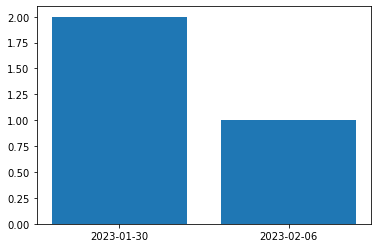

In [32]:
# count the number of vehicles by week number
veh_bar_chart_df = veh_df.groupby('first_dow').size().reset_index()

# Define the start and end dates
start_date = veh_df['vehicle-purchase-date'].min() - datetime.timedelta(days=7)
end_date = veh_df['vehicle-purchase-date'].max()
# Create a range of dates
date_range = pd.date_range(start=start_date, end=end_date, freq='W-MON')
# Get the week start dates
week_start_dates = date_range.strftime('%Y-%m-%d').tolist()

fig, ax = plt.subplots()
ax.bar(week_start_dates, veh_bar_chart_df[0])
plt.show()

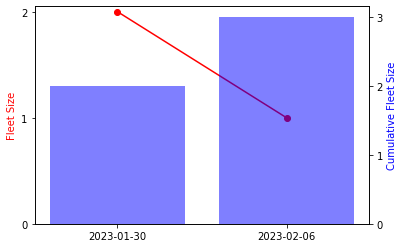

In [48]:
veh_count = len(veh_df['vin'].unique())
veh_df['week_num'] = veh_df['vehicle-purchase-date'].dt.isocalendar().week
veh_df['first_dow'] = veh_df['vehicle-purchase-date'].map(lambda x:get_first_day_of_week(x.year, x.week))

# For chart
# count the number of vehicles by week number
veh_chart_df = veh_df.groupby('first_dow').size().reset_index().rename(columns={0:'fleet_size'}).sort_values(by='first_dow')
veh_chart_df['cum_fleet_size'] = veh_chart_df['fleet_size'].cumsum()
# Define the start and end dates
start_date = veh_df['vehicle-purchase-date'].min() - datetime.timedelta(days=7)
end_date = veh_df['vehicle-purchase-date'].max()
# Create a range of dates
date_range = pd.date_range(start=start_date, end=end_date, freq='W-MON')
# Get the week start dates
week_start_dates = date_range.strftime('%Y-%m-%d').tolist()

fig, ax1 = plt.subplots()
ax1.plot(week_start_dates, veh_chart_df['fleet_size'], color='red', marker='o')
ax1.set_ylabel('Fleet Size', color='red')
ax1.set_ylim(0)
ax1.yaxis.get_major_locator().set_params(integer=True)

ax2=ax1.twinx()
ax2.bar(week_start_dates, veh_chart_df['cum_fleet_size'], color='blue', alpha=0.5)
ax2.set_ylabel('Cumulative Fleet Size', color='blue')
ax2.yaxis.get_major_locator().set_params(integer=True)


In [9]:
veh_count = len(veh_df['vin'].unique())
veh_df['week_num'] = veh_df['vehicle-purchase-date'].dt.isocalendar().week
veh_df['first_dow'] = veh_df['vehicle-purchase-date'].map(lambda x:get_first_day_of_week(x.year, x.week))

# For chart
# count the number of vehicles by week number
veh_chart_df = veh_df.groupby('first_dow').size().reset_index().rename(columns={0:'fleet_size'}).sort_values(by='first_dow')
veh_chart_df['cum_fleet_size'] = veh_chart_df['fleet_size'].cumsum()
veh_chart_df['first_dow'] = veh_chart_df['first_dow'].astype('str')
veh_chart_df

,first_dow,fleet_size,cum_fleet_size
0,2023-01-30,2,2
1,2023-02-06,1,3


In [2]:
import plotly.graph_objects as go
import datetime

# create some data with date ranges
ranges = [('Jan 10', 'Jun 20'), ('Mar 1', 'Apr 30')]

# create a scatter plot with date ranges
fig = go.Figure()
for i, (start, end) in enumerate(ranges):
    fig.add_trace(go.Scatter(
        x=[datetime.datetime.strptime(start + ' 2021', '%b %d %Y'), datetime.datetime.strptime(end + ' 2021', '%b %d %Y')],
        y=[i + 1, i + 1],
        mode='lines',
        name=f'Range {i + 1}'
    ))

# update layout
fig.update_layout(title='Date Ranges', xaxis_title='Date', yaxis_title='Range')

# show the plot
fig.show()


In [9]:
import plotly
import plotly.figure_factory as ff

import pandas as pd

data = pd.read_json('https://cdn.rawgit.com/plotly/datasets/master/BulletData.json')

fig = ff.create_bullet(
    data, markers='markers', measures='measures',
    ranges='ranges', subtitles='subtitle', titles='title',
)
plotly.iplot(fig, filename='bullet chart from a dataframe')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>

In [15]:
import plotly.figure_factory as ff

data = [
  {"label": "revenue", "sublabel": "us$, in thousands",
   "range": [150, 225, 300], "performance": [220,270], "point": [250]},
  
]

fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='h',
    title='my simple bullet chart'
)
fig.show()

ZeroDivisionError: float division by zero